# Details
* Cost : €0.98/pce, two are needed for best results
* Material : NiZn
* Dimensions : OD 25.4mm, ID 15.5mm, H 6.35mm
* Manufacturer : Fair-Rite
* Part Number : 5943001301

In [3]:
import sys
sys.path.insert(0, '../Calculations/')
from calcInductors import *

turns_ratio = 7
Pmax = 5 # [W]
Zin = 50 #  [Ω]
fmin = 3e6 # [Hz]

d = 0.5e-3 # [m] wire diameter

# Fair-Rite 5943001301 (#43 material)
# Toroid
Al = 500 # [nH/N²] Inductance factor
Ae = 0.308e-4 # [m²] Effective cross-sectional area
Bmax = 0.22 # [T], from [Fair-rite materials](https://www.fair-rite.com/materials/): Inductive Materials
OD = 25.4e-3 # [m] outer diameter
ID = 15.5e-3 # [m] inner diameter
h = 6.35e-3 # [m] height
Lp_min = 13.5e-6 # [H] minimum required inductance

[Np, Ns] = calc_inductor_turns(Al, Lp_min, turns_ratio)
print("Required number of turns on primary winding: " + str(Np))
print("Required number of turns on secondary winding: " + str(Ns))
if Np+Ns < calc_toroid_max_turns(ID, d):
    print("The total number of turns will fit on the inductor.")
else:
    print("The total number of turns doesn't fit on the inductor.")

print("Primary coil wire length: " + str(calc_toroid_wirelength(OD, ID, d, h, Np))+"m")
print("Secondary coil wire length: " + str(calc_toroid_wirelength(OD, ID, d, h, Ns))+"m")

B = calc_max_flux_density(Ae, Pmax, Zin, fmin, Np)
print('Maximum flux density: {:.3}T'.format(B))
if B > Bmax:
    print("Error : Exceeding maximum flux density.")
else:
    print("Flux density OK.")

Required number of turns on primary winding: 6
Required number of turns on secondary winding: 42
The total number of turns will fit on the inductor.
Primary coil wire length: 0.14m
Secondary coil wire length: 0.99m
Maximum flux density: 0.00642T
Flux density OK.


# Winding the core using the "traditional method"

> **NOTE**
>
> * Use enameled Cu-wire.
> * Check if you can actually solder the wire before winding your coils.
> * Use ⌀0.5mm or larger wire.  It keeps its shape more easily and is less likely to form kinks while winding.

1. Cutting 1.2m meter of wire
2. Folding 20cm back on itself and twist.
3. Starting point is where twist ends.  Make 6 windings with the twisted wire.
4. Go back to the starting point.  Make 15 windings with the single wire.
5. Go through the middle and wind back 21 more windings.


### Measurements
If you use Youtube as a source for 49:1 unun measurements, you'll notice that:
1. Most of them only measure S11 (sometimes without even loading the secondary coil).
2. Some of them measure S21 in a back to back measurement : not ideal

In [4]:
# Given parameters
f = 500e3 # [Hz] Measuring frequency
Z0 = 50 # [Ω] source impedance

# Measured parameters with NanoVNA
Z_open = 1.996 + 52.283j # [Ω] Measured impedance at frequency f of primary coil, with secondary coil open
Z_closed = 0.017 + 4.028j # [Ω] Measured impedance at frequency f of primary coil, with secondary coil closed
SRF = 3.55e6 # [Hz] Open circuit self-resonant frequency
R_max = 442 # [Ω] Open Circuit SRF R_max

# Calculated parameters
transformer_bandwidth_calculation(f, SRF, 7, Z0, Z_open, Z_closed)

Leakage inductance = 1.28e-06H
Magnetization inductance = 1.54e-05H
Al = 3.13e+02 nH/N²
Cw = 1.31e-10 F
Low frequency cut-off (fl) = 5.18e+05Hz
High frequency cut-off due to winding capacitance = 2.43e+07Hz
High frequency cut-off due to resonance of winding capacitance and leakage inductance = 1.23e+07Hz


<img src="./measurements/insertion_loss_.png" alt="Insertion loss versus frequency for various transformer setups" width="1000"/>

Due to wrong calibration, the frequency dependent calibration of mag(S21) is replaced by the theoretical value of 0.04.

### Stacked cores, spread windings

1. By stacking two toroids, we can get the same inductance with half the number of windings.  Less windings means less capacitive coupling.

In [5]:
# Given parameters
f = 500e3 # [Hz] Measuring frequency
Zs = 50 # [Ω] source impedance

# Measured parameters with NanoVNA
Z_open =  1.206 + 44.270j # [Ω] Measured impedance at frequency f of primary coil, with secondary coil open
Z_closed =  0.087 + 0.618j # [Ω] Measured impedance at frequency f of primary coil, with secondary coil closed
SRF =  6.0e6 # [Hz] Open circuit self-resonant frequency
R_max = 597.538 # [Ω] Open Circuit SRF R_max

# Calculated parameters
transformer_bandwidth_calculation(f, SRF, 4, Zs, Z_open, Z_closed)

Leakage inductance = 1.97e-07H
Magnetization inductance = 1.39e-05H
Al = 8.68e+02 nH/N²
Cw = 5.06e-11 F
Low frequency cut-off (fl) = 5.73e+05Hz
High frequency cut-off due to winding capacitance = 6.29e+07Hz
High frequency cut-off due to resonance of winding capacitance and leakage inductance = 5.04e+07Hz


The measurement results are shown in the same graph (yellow line).
I was expecting better high frequency performance, as the calculated high frequency cut-off values were > 50 MHz.  The secondary winding is very sensitive to capacitive loading.  _Because of the turns ratio N, the secondary capacitance will appear N2 larger at the primary and will resonate with the primary magnetizing inductance. ([Gary Rondeau](https://squashpractice.com/2021/07/20/engineering-the-efhw-491-transformer-and-antenna/))_

# Evaluation of the _2x 5943001301 | 4:28 transformer_
<img src="./vna_measurements/trafo_4p28s.jpg" alt="Picture of 4:28 transformer" width="1000"/>

Winding the core very dense, as proposed by [Engineering the EFHW 49:1 Transformer and Antenna](https://squashpractice.com/2021/07/20/engineering-the-efhw-491-transformer-and-antenna/)

# Construction
1. 2x 5943001301 toroid : type #43 material
2. ⌀0.3mm enamel Cu-wire used, but that doesn't keep its shape very well.  ⌀0.5mm would probably have been a better choice.
2. Tape the two toroids on top of each other for ease of winding
3. Wind the second coil first : 28 windings
4. Wind the primary coil on top of the secondary coil : 4 windings
5. Fix the windings with tape

# Loss calculation & measurement

Text(0.5, 1.0, 'VSWR of transformer for different matching loads')

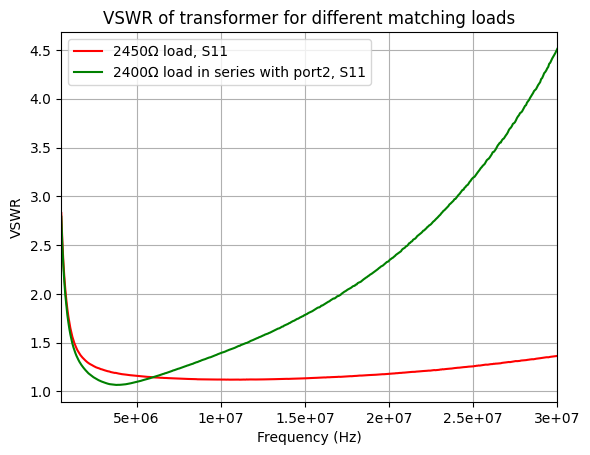

In [6]:
# pip install scikit-rf
import skrf as rf
import math
import matplotlib.pyplot as plt
import numpy as np
from plotResults import plot_impedance

# Plot VSWR of transformer terminated in a 2450Ω load.
fig, ax = plt.subplots()
nw = rf.Network('./vna_measurements/2450ohm_no_sma_cable.s1p')
nw.name='2450Ω load'
nw_f1 = nw['0.50MHz-30MHz']
nw_f1.plot_s_vswr(m=0,n=0,color='r', ax=ax,logx=False)

# Plot VSWR of transformer terminated in a 2400Ω attenuator in series with port 2
nw = rf.Network('./vna_measurements/4p_28s_2400ohm_noCable.s2p')
nw.name='2400Ω load in series with port2'
nw_f2 = nw['0.50MHz-30MHz']
nw_f2.plot_s_vswr(m=0,n=0,color='g', ax=ax, logx=False)
ax.grid()
ax.set_title('VSWR of transformer for different matching loads')

# plot_impedance('./vna_measurements/2450ohm_no_sma_cable.s1p')

[DL2MAN : Antenna building #1 - EFHW Antenna - theory and practice of the broadband transformer](https://www.youtube.com/watch?v=2-4J8ECkoe4)
 * illustration of traditional winding method
 * SWR of 1.33 at 28MHz after adding a 100pF capacitor on the primary coil.
 
When the secondary coil is loaded with a 2450Ω resistor as in DL2MAN's measurement, we see that our 4:28 transformer doesn't need a 100pF "matching capacitor" to get a low SWR.

So even without the twisting of the leads and crossover winding, we can still get a low VSWR.

[DL2MAN : EFHW Transformer - without capacitor: alternative winding pattern](https://www.youtube.com/watch?v=j-lIng7vPkk&t=209s) : DL2MAN also found out that with an improved winding pattern, the capacitor is not needed.

Remark that it makes a big difference whether the the 2450Ω load on the secondary coil is formed by a resistor, or by a 2400Ω in series with port2.

/home/christoph/.local/lib/python3.10/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)


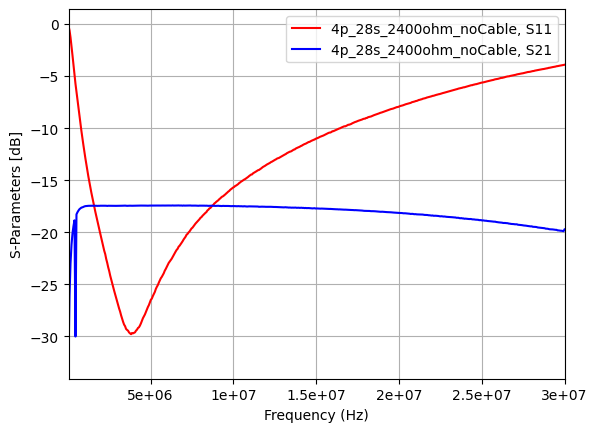

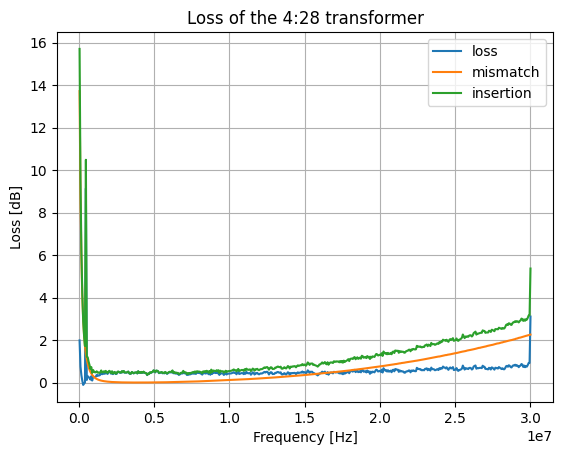

In [7]:
from plotResults import plot_s_parameters, plot_transformer_loss

nw = rf.Network('./vna_measurements/4p_28s_2400ohm_noCable.s2p')
nw_cal = rf.Network('./vna_measurements/2400ohm_noCable.s2p')
plot_s_parameters(nw)
loss_db = plot_transformer_loss(nw, nw_cal, 'Loss of the 4:28 transformer')

# Efficiency
[DL2MAN: Antenna building #2 - EFHW Antenna - figuring out the right core size](https://www.youtube.com/watch?v=nNzTf1F12BE&t=917s)

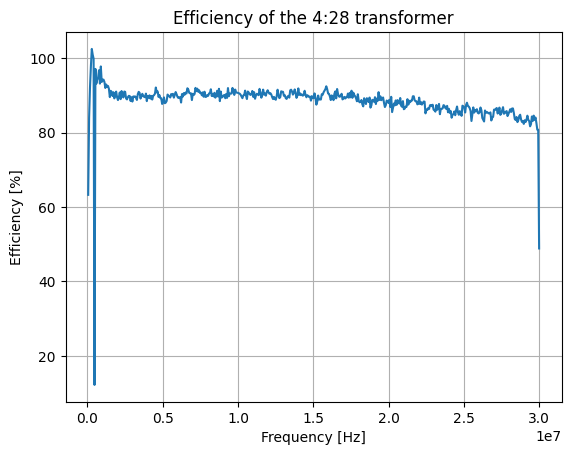

In [8]:
from plotResults import plot_efficiency

plot_efficiency(nw.f, loss_db,'Efficiency of the 4:28 transformer')

Eventhough #43 material is not recommended up to 30MHz, we can see that it's still possible to use the material for a HF-transformer up to 28MHz with a low loss.

# Conclusion

* Performs well throughout the HF band
* Requires two toroids, which makes it more expensive